In [0]:
import pandas as pd
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Add,concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
from sklearn.model_selection import train_test_split

In [0]:
#from google.colab import files
#uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd /content/drive/My\ Drive/657A3part2

/content/drive/My Drive/657A3part2


In [0]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('testX.csv')

In [0]:
train_data['Label'].unique()

array([4, 0, 1, 2, 3])

In [0]:
batch_size = 256
num_classes = 5
epochs = 12
img_rows, img_cols = 28, 28

x_train = train_data.drop(['Label', 'Id'], axis=1).to_numpy()
y_train = train_data['Label'].to_numpy()
x_test = test_data.drop(['Id'], axis = 1).to_numpy()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes)

print(x_val.shape)
print(y_val)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

x_train /= 255
x_val /= 255

(6000, 28, 28, 1)
[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [0]:
inputs =  Input(shape = (28,28,1))
x = Conv2D(16, kernel_size=(5,5), activation='relu', padding = 'same')(inputs)
x = Conv2D(32, kernel_size=(5,5), activation='relu', padding = 'same')(x)
x = MaxPooling2D(pool_size = (2,2))(x)

a1 = Conv2D(16, kernel_size=(1,1), activation='relu', padding='same')(x)
a2 = Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(x)
a3 = Conv2D(16,kernel_size=(5,5), activation='relu', padding='same')(x)
a4 = MaxPooling2D(pool_size = (1,1), strides=(1,1))(x)
a4 = Conv2D(16, kernel_size=(1,1), activation='relu', padding='same')(a4)
y = concatenate([a1,a2,a3,a4], axis=-1)
y = BatchNormalization()(y)
z = MaxPooling2D(pool_size = (2,2))(y)

#model.add(BatchNormalization())
#model.add(Dropout(0.4))
z = MaxPooling2D(pool_size=(2,2))(z)
z = Conv2D(128, kernel_size=(1,1), activation='relu', padding = 'same')(z)

#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
#model.add(Dropout(0.4))

#model.add(Conv2D(64, kernel_size=(1,1), activation='relu', padding = 'same'))

z = GlobalAveragePooling2D()(z)
z = Dense(1024, activation='relu')(z)
z = Dropout(0.25)(z)
z = Dense(256, activation='relu')(z)
z = Dropout(0.25)(z)
z = Dense(128, activation='relu')(z)
z = Dropout(0.1)(z)
pred = Dense(num_classes, activation='softmax')(z)

model = Model(inputs = inputs, outputs = pred)

#model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=0.001), metrics = ['accuracy'])

In [0]:

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 16)   416         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   12832       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 14, 14, 32)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [0]:
model.fit(x_train, y_train,
          batch_size = 1024,
          epochs = 400,
          verbose = 1,
          validation_data = (x_val, y_val))
score = model.evaluate(x_val, y_val, verbose = 0)

model.summary()

Epoch 1/400
53/53 [==============================] - 5s 86ms/step - loss: 1.2395 - accuracy: 0.4250 - val_loss: 0.9592 - val_accuracy: 0.5943
Epoch 2/400
53/53 [==============================] - 4s 72ms/step - loss: 0.8494 - accuracy: 0.6329 - val_loss: 0.7009 - val_accuracy: 0.7183
Epoch 3/400
53/53 [==============================] - 4s 72ms/step - loss: 0.6769 - accuracy: 0.7211 - val_loss: 0.5746 - val_accuracy: 0.7627
Epoch 4/400
53/53 [==============================] - 4s 72ms/step - loss: 0.6152 - accuracy: 0.7466 - val_loss: 0.6501 - val_accuracy: 0.7270
Epoch 5/400
53/53 [==============================] - 4s 72ms/step - loss: 0.5558 - accuracy: 0.7740 - val_loss: 0.4975 - val_accuracy: 0.7973
Epoch 6/400
53/53 [==============================] - 4s 72ms/step - loss: 0.5122 - accuracy: 0.7937 - val_loss: 0.4602 - val_accuracy: 0.8168
Epoch 7/400
53/53 [==============================] - 4s 73ms/step - loss: 0.4999 - accuracy: 0.8002 - val_loss: 0.4709 - val_accuracy: 0.8095
Epoch 

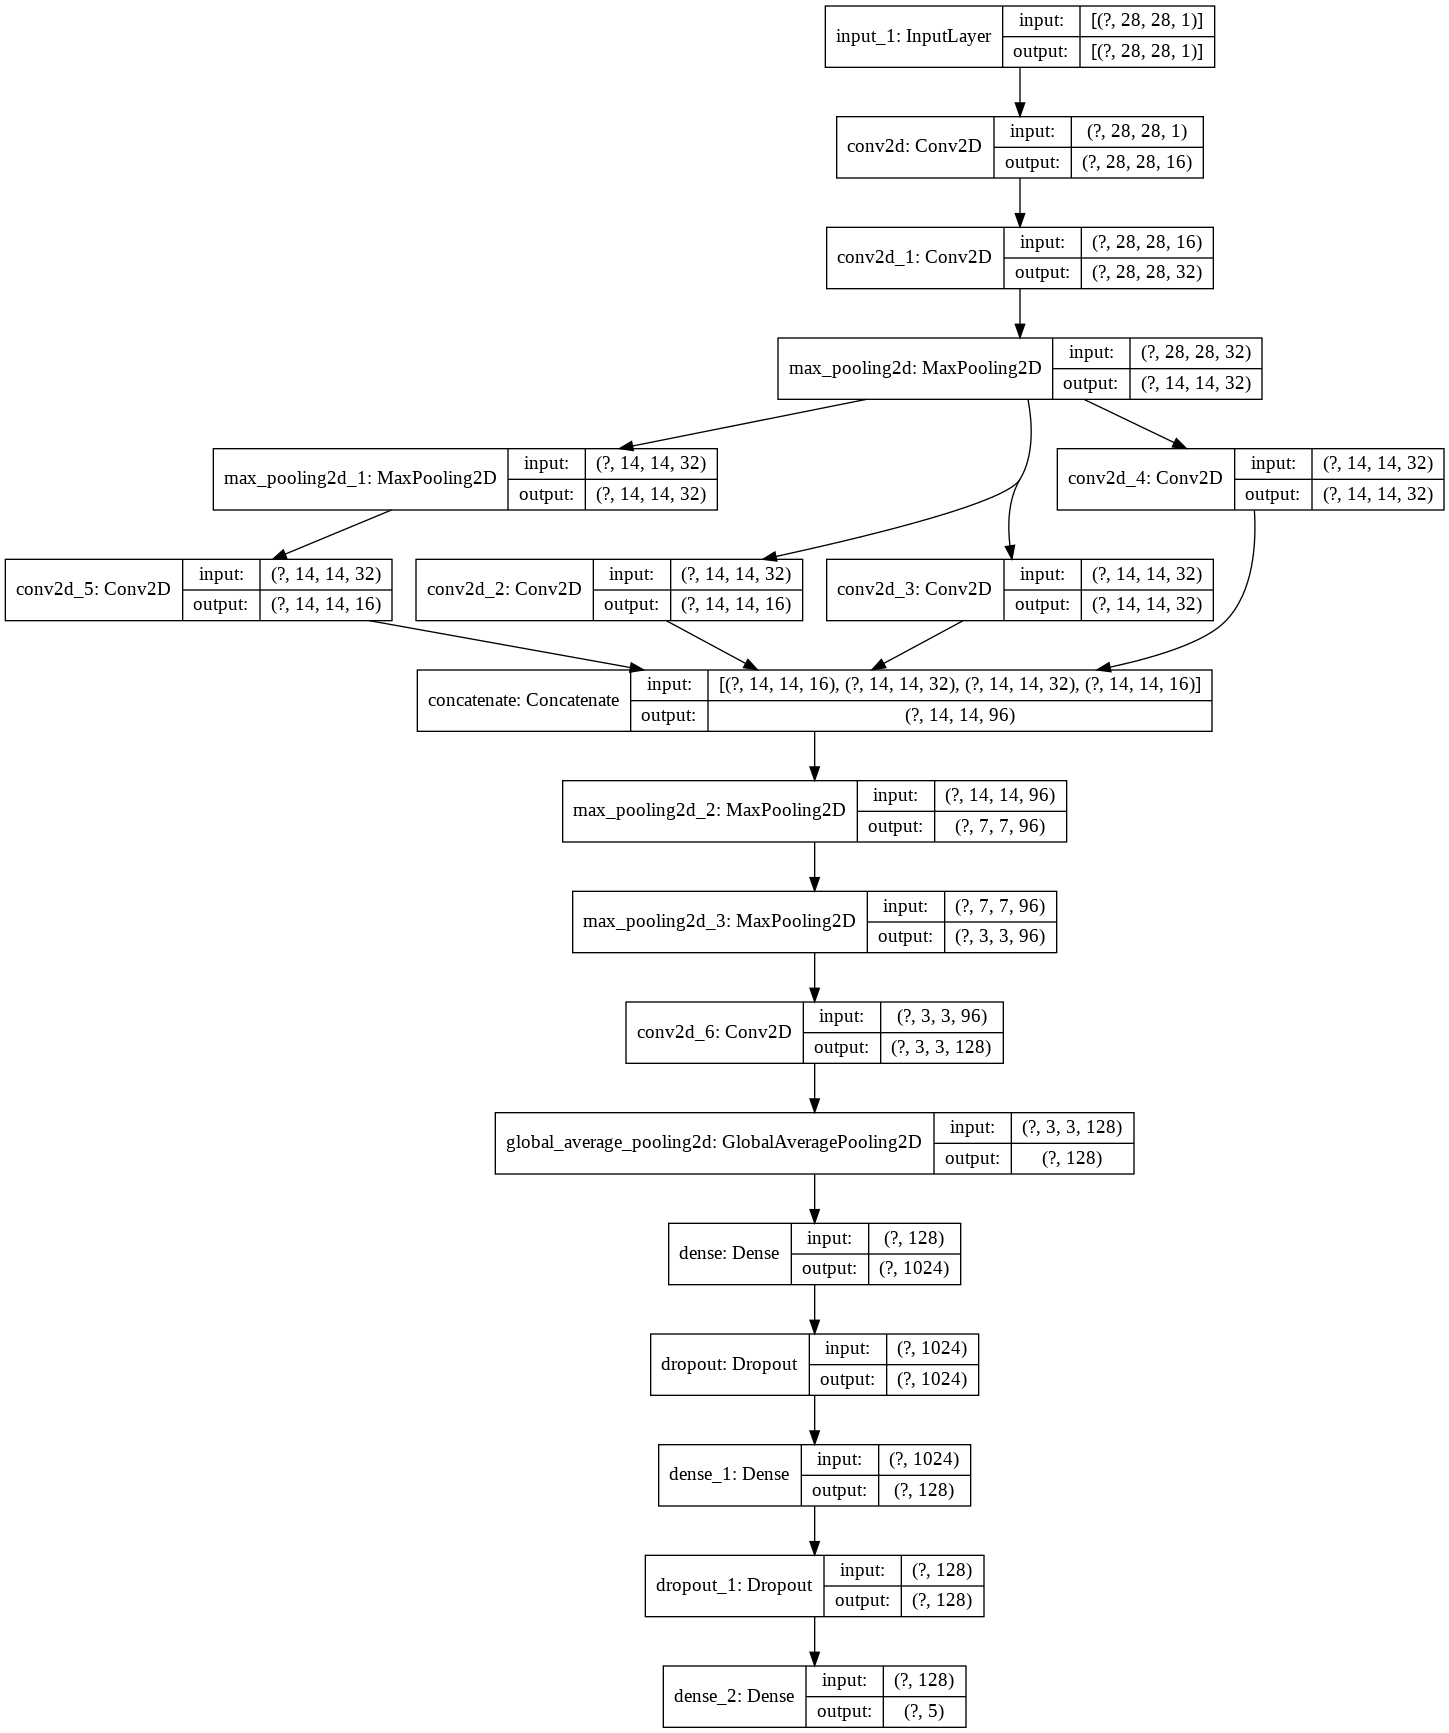

In [0]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [0]:
inputs =  Input(shape = (28,28,1))
x = Conv2D(16, kernel_size=(5,5), activation='relu', padding = 'same')(inputs)
x = Conv2D(32, kernel_size=(5,5), activation='relu', padding = 'same')(x)
x = MaxPooling2D(pool_size = (2,2))(x)
 
a1 = Conv2D(16, kernel_size=(1,1), activation='relu', padding='same')(x)
a2 = Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(x)
a3 = Conv2D(32,kernel_size=(5,5), activation='relu', padding='same')(x)
a4 = MaxPooling2D(pool_size = (1,1), strides=(1,1))(x)
a4 = Conv2D(16, kernel_size=(1,1), activation='relu', padding='same')(a4)
y = concatenate([a1,a2,a3,a4], axis=-1)
 
z = MaxPooling2D(pool_size = (2,2))(y)
 
#model.add(BatchNormalization())
#model.add(Dropout(0.4))
z = MaxPooling2D(pool_size=(2,2))(z)
z = Conv2D(128, kernel_size=(1,1), activation='relu', padding = 'same')(z)
 
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
#model.add(Dropout(0.4))
 
#model.add(Conv2D(64, kernel_size=(1,1), activation='relu', padding = 'same'))
aux = GlobalAveragePooling2D()(a4)
aux = Dense(5, activation='softmax')(aux)
z = GlobalAveragePooling2D()(z)
z = Dense(1024, activation='relu')(z)
z = Dropout(0.4)(z)
z = Dense(128, activation='relu')(z)
z = Dropout(0.2)(z)
pred = Dense(num_classes, activation='softmax')(z)
pred = pred + aux
 
model2 = Model(inputs = inputs, outputs = pred)
 
#model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=0.001), metrics = ['accuracy'])


In [0]:


model2.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 28, 28, 16)   416         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 28, 28, 32)   12832       conv2d_21[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_12 (MaxPooling2D) (None, 14, 14, 32)   0           conv2d_22[0][0]                  
____________________________________________________________________________________________

In [0]:
model2.fit(x_train, y_train,
          batch_size = 1024,
          epochs = 400,
          verbose = 1,
          validation_data = (x_val, y_val))
score = model.evaluate(x_val, y_val, verbose = 0)

Epoch 1/400
53/53 [==============================] - 4s 76ms/step - loss: 1.3248 - accuracy: 0.4039 - val_loss: 1.1045 - val_accuracy: 0.5822
Epoch 2/400
53/53 [==============================] - 4s 73ms/step - loss: 1.0543 - accuracy: 0.5999 - val_loss: 0.9819 - val_accuracy: 0.6542
Epoch 3/400
53/53 [==============================] - 4s 73ms/step - loss: 0.9193 - accuracy: 0.6907 - val_loss: 0.8312 - val_accuracy: 0.7505
Epoch 4/400
53/53 [==============================] - 4s 73ms/step - loss: 0.8356 - accuracy: 0.7352 - val_loss: 0.8006 - val_accuracy: 0.7520
Epoch 5/400
53/53 [==============================] - 4s 73ms/step - loss: 0.8017 - accuracy: 0.7466 - val_loss: 0.7468 - val_accuracy: 0.7858
Epoch 6/400
53/53 [==============================] - 4s 73ms/step - loss: 0.7409 - accuracy: 0.7828 - val_loss: 0.7332 - val_accuracy: 0.7842
Epoch 7/400
53/53 [==============================] - 4s 73ms/step - loss: 0.7163 - accuracy: 0.7921 - val_loss: 0.7109 - val_accuracy: 0.7930
Epoch 